# Where to Explore Food in Hong Kong?

## Introduction / Business Problem

Hong Kong is an international city and a well-known destination for tourists. Each year, Hong Kong attracted millions of foreign visitors (sadly a huge proportion of them are from mainland China). One of the attractions of Hong Kong is food. It is the home of lots of gourmet restaurants of international cuisines as well as local street food eateries and cafes. However, tourists may find a difficult to decide where to go for exploring food.

The purpose of my Capstone Project is to look into several pinpoint locations of each of the 3 districts (namely Central, Causeway Bay and Mongkok) which are famous for tourists, and find out the pinpoint location which has the most restaurants/cafes/eateries. This is to be served as a recommended location for tourists for lunch and dinner within each of the 3 districts considered in this project. 
In addition to the total number of restaurants, restaurants of different certain categories (namely Hong Kong Cuisine and cafe) are segmented from the total population such that if a person has a particular preference to certain categories, he/she may decide to visit the area with restaurants of his/her preference densely located. 
Hopefully, this will help tourists to discover more gourmet food in Hong Kong and boost the recovery of tourism post-COVID 19.

Many restaurants/eateries/cafes serve as a shelter for protesters during the crackdown from Hong Kong Police Force. The outcomes of this Capstone Project may be considered by protesters when determining the retreat destinations in order to stay safe from police brutality.

## Data

For each of the 3 districts (Central, Causeway Bay and Mongkok), 10 random pinpoints (with reasonable distance apart) will be selected. The number of amenities within the radius of 500 meters will be gathered from Foursquare. 
All amenities that are not restaurants/cafes/eateries will be deleted. 

The number of restaurants/cafes/eateries within the radius of 500 meters of each of the random pinpoints will be summed up and the pinpoint plotted on the map. The colour of the pinpoint will depend on the number of restaurants/cafes/eateries within the 500 meters radius.

## Methodology

In terms of methodology, this project has 2 aims. 
* The determination of the random pinpoints
* Based on the data gathered from Foursquare, finding the best location for a person to visit. 

Determining the random pinpoints
Each district have 10 random pinpoints evolving from a pinpoint subjectively chosen which is located at the edge of the area of the district.
From the chosen point, 2 functions are defined to adjust the latitude and longitude of the chosen pinpoint of each district to generate the remaining 9 pinpoints where each point gradually evolve from the chosen point. The parameters are adjusted based on trial and error to ensure all pinpoints make sense, i.e., no pinpoint lies in the sea or in the middle of a park, and each pinpoint is reasonable distant from any other pinpoints. 

Finding the best location to visit
With the coordinates of pinpoints determined, venue category of all amenities within the radius of 500 meters from the pinpoints is gathered from Foursquare. Since only restaurant is of interest in the project, venue categories not related to restaurants are dropped.
From here, the data needed for our project are ready and the below were prepared by summing up the total number of restaurants by various groupings.
* Total number of restaurants within the radius of 500 meters of each pinpoints.
  This is the metrics for restaurant density of a pinpoint
* Total Number of Hong Kong cuisine restaurants/cafes in all the pinpoints within the district
  This is the metrics for restaurant density of a certain food type for a district
  
To find out the recommended area within each district for dining, the pinpoints are plotted on a map with the colour of the pinpoint indicating the number of restaurants within the radius of 500 meters. From the map, one can figure out the area with the highest number of restaurants located within the district.

As for the dominating food type of each district, a horizontal bar chart is presented plotting the total number of restaurants of each food type from all 10 pinpoints within the district. One can then easily see the dominating food type of each district, and hence travelling to the district with the dominating food type he feels like having on the day.


## Results

Below map shows the locations of each pinpoints and the number of restaurants within the radius of 500 meters.
Red pinpoint indicates number of restaurants is the highest, followed by orange, yellow and light blue the lowest.

In [19]:
# create map of Hong Kong using latitude and longitude values
map_hk2 = folium.Map(location=[df_pinpt['Latitude'][0]+1/80, df_pinpt['Longitude'][0]+1/500], zoom_start=13)

# set color scheme for the pinpoints based on number of restaurants
x = np.arange(df_pinpt['Restaurant_Cnt'].max())
ys = [i + x + (i*x)**2 for i in range(df_pinpt['Restaurant_Cnt'].max())]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, district, Cnt in zip(df_pinpt['Latitude'], df_pinpt['Longitude'], df_pinpt['District'], df_pinpt['Restaurant_Cnt']):
    label = 'District: {}, Restaurant Count: {}'.format(district, Cnt)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[Cnt-1],
        fill=True,
        fill_color=rainbow[Cnt-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_hk2)  
    
map_hk2

For Central district (bottom left cluster in the map), restaurants are mainly located in the middle of the cluster, between Central and Sheung Wan area.

For Causeway Bay district (bottom right cluster), restaurants are concentrated around centre of Causeway Bay and Wan Chai (a district next to Causeway Bay).

For Mongkok (top centre cluster),  there is no red pinpoints, meaning that restaurants are less concentrated than the other 2 districts. Considering just the pinpoints within Mongkok, the orange pinpoints conentrated in centre of the cluster, meaning the restaurants in Mongkok are mostly densely located in centre of Mongkok.

Below is the horizontal bar chart of number of restaurants by district and food type.

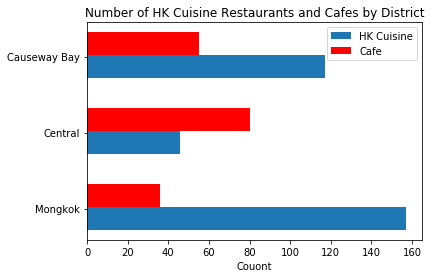

In [25]:
ax = plt.subplot(111)

y_pos=np.arange(len(df_HK_Cuisine['HK_Cuisine']))
ax.barh(y_pos, HK_Cuisine_Cnt, height=0.3,  align='center', label='HK Cuisine')
ax.barh(y_pos-0.3, Cafe_Cnt, height=0.3,  align='center', color='red', label='Cafe')


ax.set_yticks(y_pos-0.13)
ax.set_yticklabels(df_HK_Cuisine.index)
ax.set_xlabel('Couont')
ax.set_title('Number of HK Cuisine Restaurants and Cafes by District')
ax.invert_yaxis()
ax.legend()


plt.show()

Mongkok has the highest number of Hong Kong cuisine restaurants among the 3 districts, whilst Central has the most choices for a cup of coffee or high tea. 
Causeway Bay is in the middle, with a good balance in the choices for cafe and Hong Kong Cuisine restaurants.

## Discussion

Based on the study of the 3 districts (Central, Causeway Bay and Mongkok), Central and Causeway Bay have certain areas where restaurants are highly concentrated and areas where restaurants are less compact. This is different from Mongkok where restaurants are less concentrated and relatively equally distributed.
Tourists may take into consideration of the outcomes of this study and head to the red (orange for Mongkok) pinpoints in the map for exploring the food in Central and Causeway Bay.

In case one has a specific preference, e.g., Hong Kong Cuisine or a cup of coffee to start the day, tourists may consider the horizontal bar chart above and goes to Mongkok for traditional Hong Kong taste and Central for coffee.

For future study, rating from reviewers could be taken into account showing which area's restaurants overall are of higher quality.
Together with the price of restaurants, a unsupervised clustering model can be built to cluster each restaurant to determine if it is a fine-dining (expensive and high rating), casual dining (mid to high price), fast food (low price) or blacklisted (poor rating from reviewers) restaurant. 
The bar chart depicting the food type of a district can also be revised accordingly.

## Conclusion

This project provided a guide for tourists visiting Hong Kong on where they should go for exploring the great food in Hong Kong by pinpointing the areas that restaurants are concentrated. 

Central and Causeway Bay have areas which are highly concentrated than other areas within the district whereas Mongkok is less compact with restaurants. However, if you are up to Hong Kong traditional taste, Mongkok is the place to go as it is the host to more Hong Kong Cuisine restaurants than the other 2 districts. But if you are looking for a nice cup of coffee, Central is your destination.

With regards to the retreat plan for protesters, protesters in Central should head towards Sheung Wan while their 'Brothers' in Casueway Bay should head towards Wan Chai and Centre of Causeway Bay when they encounter Police brutality in crackdown. Restaurants in Mongkok are relatively less compact, and hence protests should be avoided there.